In [1]:
from google.colab import files

In [4]:
uploaded=files.upload()

Saving Admission_predict.csv to Admission_predict (1).csv


In [5]:
uploaded=files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (1).csv


## Exploratory Analysis

To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os 
import pandas as pd


## Functions for plotting daats

In [35]:
import PIL
from matplotlib.widgets import PolygonSelector
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df,nGraphShown,nGraphPerRow):
    nunique=df.nunique
    df=df[[col for col in df if nunique[col]>1 and nunique[col]<50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow,nCol=df.shape
    columnNames=list(df)
    nGraphRow = (nCol+nGraphPerRow-1)/nGraphPerRow
    plt.figure(num=None,figsize=(6*nGraphPerRow, 8*nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol,nGraphShown)):
        plt.subplot(nGraphRow,nGraphPerRow,i+1)
        columnDf=df.iloc[:,i]
        if (not np.issubdtype(type(columnDf.iloc[0]),np.number)):
            valueCounts=columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]}(column{i})')
    plt.tight_layout(pad=1.0,w_pad=1.0,h_pad=1.0)
    plt.show()

In [37]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [39]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Let's check 1st csv file:Admission _predict.csv

## Visualize the data

In [46]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1=pd.read_csv('Admission_predict.csv',delimiter=',',nrows=nRowsRead)
df1.dataframeName='Admission_predict.csv'
nRow,nCol=df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 400 rows and 9 columns


In [47]:
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Distribution graphs(histogram/bar graph) of sampled columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb510aa50>,
      dtype=object)

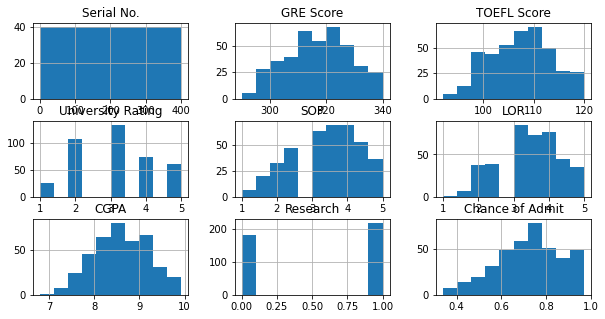

In [72]:
df1.hist(figsize=(10,5))

## Correlation matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


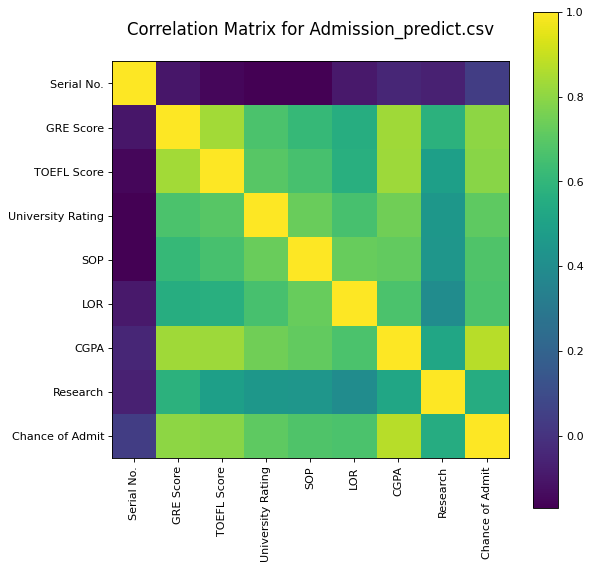

In [61]:
plotCorrelationMatrix(df1,8)

## Scatterplot and density plots


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


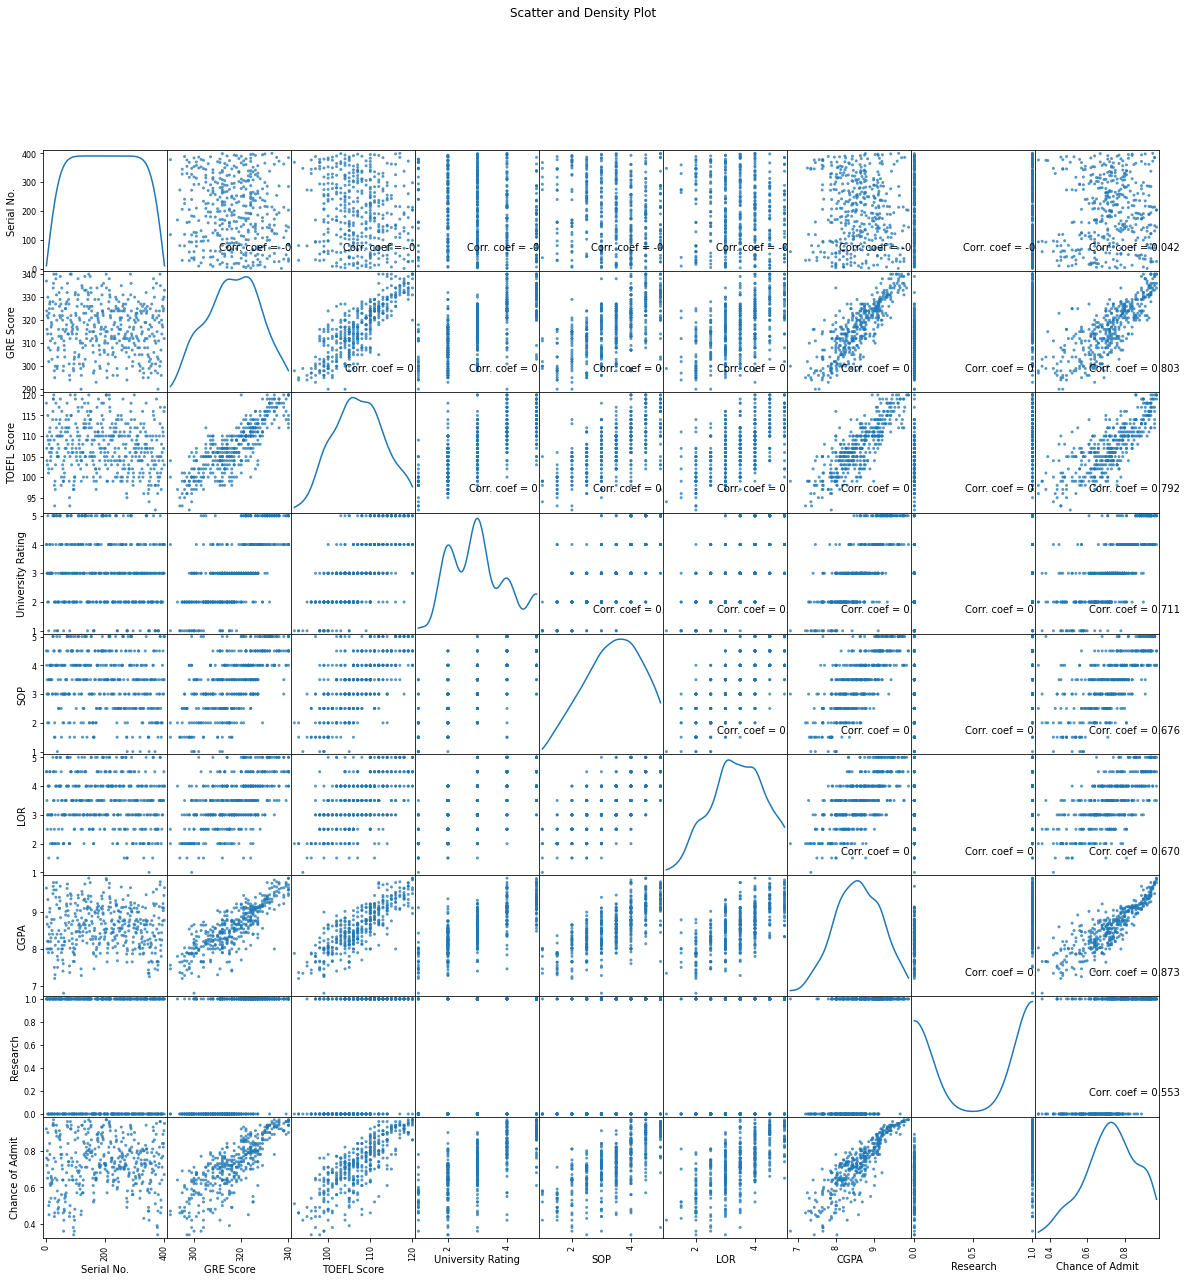

In [64]:
plotScatterMatrix(df1,20,10)

## Let's check 2nd csv file:Admission_predict_Ver1.1.csv

In [65]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('Admission_Predict_Ver1.1.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Admission_Predict_Ver1.1.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 9 columns


In [66]:
df2.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Distribution graphs (histogram/bar graph) of sampledcolumns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb776b1d0>,
      dtype=object)

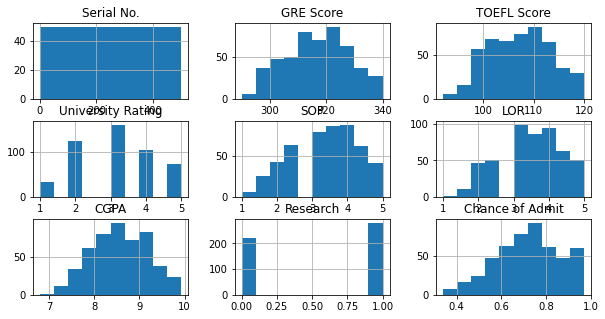

In [71]:
df2.hist(figsize=(10,5))

## Correlation matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


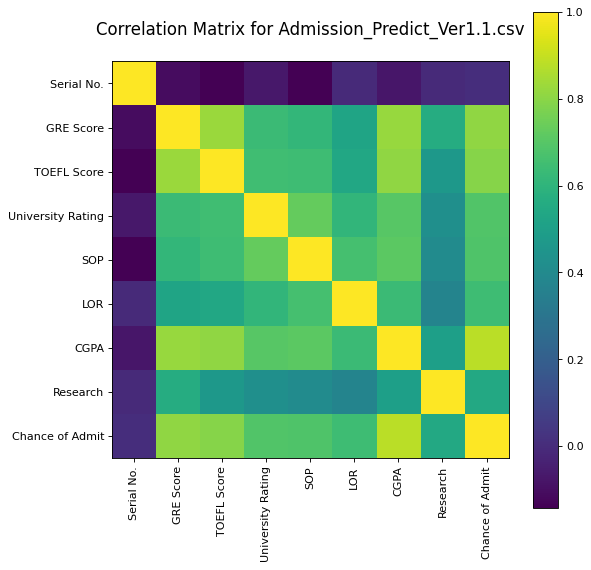

In [69]:
plotCorrelationMatrix(df2,8)

## Scatter and density plots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


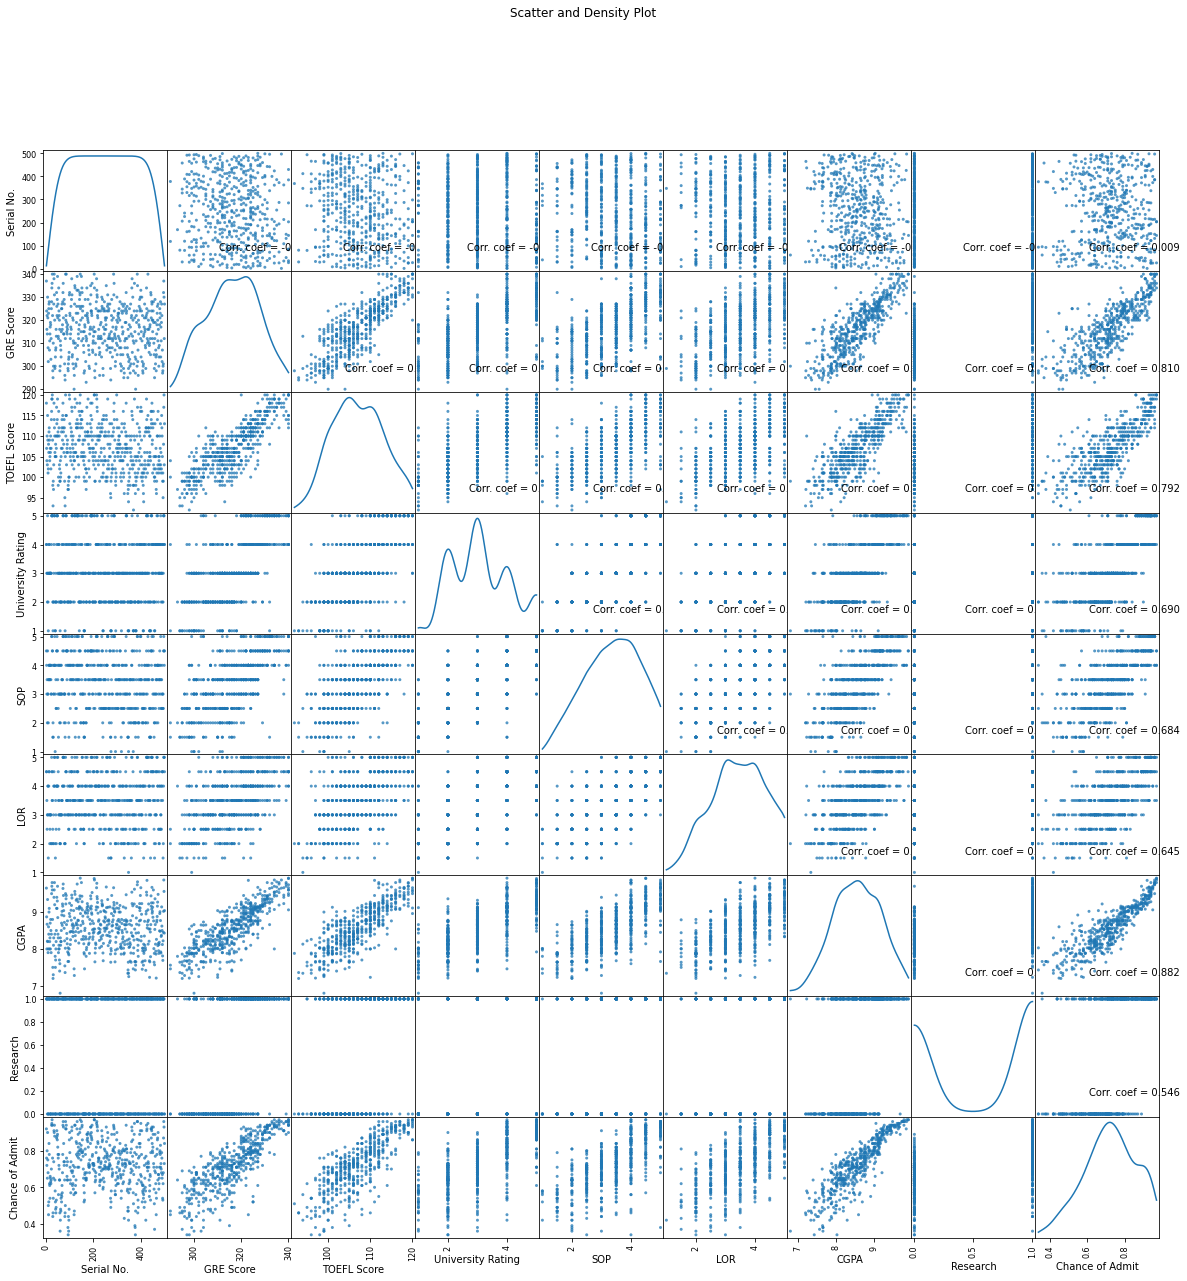

In [70]:
plotScatterMatrix(df2,20,10)